### Twitter Dataset
## 1 Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
result = pd.DataFrame()
desired_columns=['name','username','features','likes_count','retweets_count','replies_count','tweet']
with pd.read_json('twitter_features.json', lines=True, chunksize=20000) as reader:
    reader
    for chunk in reader:
        chunk = chunk[desired_columns]
        result = pd.concat([result, chunk], ignore_index=True)
        print(result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            20000 non-null  object
 1   username        20000 non-null  object
 2   features        20000 non-null  object
 3   likes_count     20000 non-null  int64 
 4   retweets_count  20000 non-null  int64 
 5   replies_count   20000 non-null  int64 
 6   tweet           20000 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            40000 non-null  object
 1   username        40000 non-null  object
 2   features        40000 non-null  object
 3   likes_count     40000 non-null  int64 
 4   retweets_count  40000 non-null  int64 
 5   replies_count   4000

In [6]:
result.head()

,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Barack Obama,barackobama,"[0.032840799999999996, 0.279632999999999, 0.30...",314,1698,111,JoeBiden The people I grew up with and my neig...
1,Barack Obama,barackobama,"[-0.1898005, 0.23507037500000003, 0.49903625, ...",566,2252,98,VP Biden War should always be the absolute las...
2,Barack Obama,barackobama,"[-0.094298928571428, 0.136600214285714, 0.4788...",217,748,212,VP Biden on Iran These are the most crippling ...
3,Barack Obama,barackobama,"[-0.1626531, 0.21753979999999998, 0.3880757999...",103,531,83,Watch live JoeBiden lays out the ObamaBiden pl...
4,Barack Obama,barackobama,"[-0.30785029999999997, 0.2269174, 0.2245550999...",66,257,46,Be sure to follow OFADebates during tonights V...


In [7]:
result.groupby('name').size()

name
Adam Schiff                      1553
Al Franken                       4688
Al Gore                          2232
Alexandria OcasioCortez          6851
Amy Klobuchar                   12008
Andrew Cuomo                    22324
Andrew Yang                     11087
Arnold                           4428
Barack Obama                     8132
Ben  Candy Carson                2065
Bernie Sanders                  14201
Beto ORourke                     6595
Bill Clinton                      937
Bloomberg Policy Proposals         13
Chuck Schumer                   18513
Cory Booker                     48228
Donna Brazile                   35426
Elijah E Cummings                2141
Elizabeth Warren                14596
Gabrielle Giffords               3914
Gov Mike Huckabee               11022
Hillary Clinton                  9037
Ilhan Omar                       6996
James E Clyburn                  3389
Joe Biden                        6207
Joe Kennedy III                  4272
John Ke

In [8]:
result.columns

Index(['name', 'username', 'features', 'likes_count', 'retweets_count',
       'replies_count', 'tweet'],
      dtype='object')

In [9]:
politicians = pd.read_csv('../scraper/politicians.csv')
politicians['twitter_account'] = politicians['twitter_acount'].str.lower()
politicians

,politician_name,twitter_acount,party,twitter_account
0,Barack Obama,BarackObama,democrat,barackobama
1,Bernie Sanders,BernieSanders,democrat,berniesanders
2,Joe Biden,JoeBiden,democrat,joebiden
3,Kamala Harris,VP,democrat,vp
4,Arnold Schwarzenegger,Schwarzenegger,republican,schwarzenegger
5,Hillary Clinton,HillaryClinton,democrat,hillaryclinton
6,Karl Rove,KarlRove,republican,karlrove
7,Elizabeth Warren,ewarren,democrat,ewarren
8,Al Gore,algore,democrat,algore
9,Nancy Pelosi,TeamPelosi,democrat,teampelosi


In [10]:
df = pd.merge(politicians, result, left_on='twitter_account', right_on='username')

In [11]:
df.head(3)

,politician_name,twitter_acount,party,twitter_account,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Barack Obama,BarackObama,democrat,barackobama,Barack Obama,barackobama,"[0.032840799999999996, 0.279632999999999, 0.30...",314,1698,111,JoeBiden The people I grew up with and my neig...
1,Barack Obama,BarackObama,democrat,barackobama,Barack Obama,barackobama,"[-0.1898005, 0.23507037500000003, 0.49903625, ...",566,2252,98,VP Biden War should always be the absolute las...
2,Barack Obama,BarackObama,democrat,barackobama,Barack Obama,barackobama,"[-0.094298928571428, 0.136600214285714, 0.4788...",217,748,212,VP Biden on Iran These are the most crippling ...


In [13]:
## creating the icml dataset
l = df.features.tolist()
icml_data = pd.DataFrame(l,columns=[i for i in range(len(df.features[1]))])
icml_data['username'] = df['username'].reset_index().drop(columns='index')
icml_data.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,username
0,0.032841,0.279633,0.301100,-0.251599,0.012750,0.166686,-0.330437,0.210326,-0.170756,0.074855,...,0.000949,0.480000,0.235797,0.475000,0.288314,3,0.900000,2.509892,0.100000,barackobama
1,-0.189801,0.235070,0.499036,-0.185174,-0.132197,-0.034101,-0.156481,0.200357,-0.180266,-0.044649,...,-0.000652,0.562500,0.242061,0.437500,0.286411,2,0.875000,2.837649,0.125000,barackobama
2,-0.094299,0.136600,0.478858,-0.246649,0.073277,-0.161007,-0.434388,0.275694,-0.253582,0.126566,...,0.000349,0.397959,0.215497,0.464286,0.287938,3,0.285714,1.871197,0.071429,barackobama
3,-0.162653,0.217540,0.388076,-0.211040,0.050524,0.109540,-0.337217,0.112349,-0.174558,-0.045012,...,-0.012203,0.680000,0.198997,0.450000,0.287228,1,1.000000,3.469719,0.000000,barackobama
4,-0.307850,0.226917,0.224555,-0.225014,0.021294,0.132904,-0.063445,0.149862,-0.272753,-0.030819,...,0.003891,0.620000,0.218174,0.450000,0.287228,1,1.000000,3.245893,0.000000,barackobama


In [14]:
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['username'] = le.fit_transform(df['username'])

In [16]:
df['username'].head()

0    6
1    6
2    6
3    6
4    6
Name: username, dtype: int64

In [17]:
%%time

X_ = df['tweet']
y_ = df['username']

pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer()), 
                 ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       520
           1       1.00      0.01      0.02      1488
           2       0.00      0.00      0.00       725
           3       0.00      0.00      0.00      4041
           4       0.00      0.00      0.00      3710
           5       0.00      0.00      0.00      2327
           6       0.00      0.00      0.00      2661
           7       0.99      0.02      0.03      4647
           8       0.00      0.00      0.00      2235
           9       0.00      0.00      0.00       296
          10       0.13      1.00      0.23     15848
          11       0.87      0.05      0.09     11686
          12       1.00      0.00      0.00      4746
          13       0.00      0.00      0.00      1263
          14       1.00      0.00      0.00      3653
          15       0.00      0.00      0.00      3029
          16       0.00      0.00      0.00      2241
          17       0.00    

/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[ 0  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Normalized confusion matrix
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0094086  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00534336 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


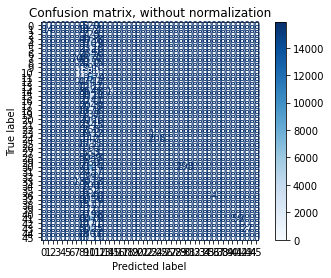

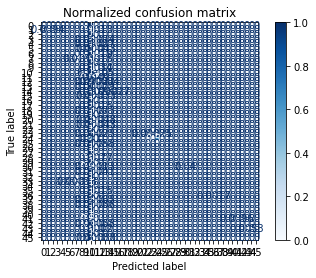

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#class_names= ['dem','rep']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [20]:
from sklearn import preprocessing
categorical = ['username']  
le = preprocessing.LabelEncoder()
icml_data['username'] = le.fit_transform(df['username']) 
icml_data['username'].head()

0    6
1    6
2    6
3    6
4    6
Name: username, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier

X_ =  icml_data.iloc[:,1:120]
y_ = icml_data['username']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)

In [22]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       520
           1       0.98      0.16      0.28      1488
           2       0.94      0.02      0.04       725
           3       0.72      0.41      0.52      4041
           4       0.85      0.32      0.46      3710
           5       0.78      0.50      0.61      2327
           6       0.75      0.43      0.55      2661
           7       0.66      0.75      0.70      4647
           8       0.92      0.32      0.48      2235
           9       0.00      0.00      0.00       296
          10       0.58      0.99      0.73     15848
          11       0.60      1.00      0.75     11686
          12       0.52      0.83      0.64      4746
          13       1.00      0.01      0.02      1263
          14       0.64      0.44      0.52      3653
          15       0.45      0.30      0.36      3029
          16       0.70      0.05      0.10      2241
          17       0.53    

/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[92201     0]
 [    0 33929]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


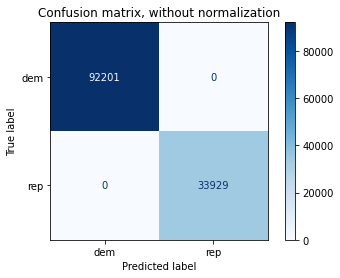

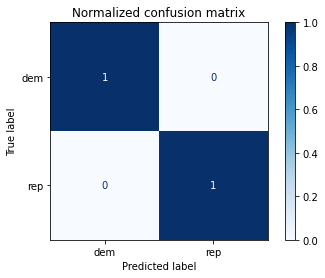

In [23]:
#class_names= ['dem','rep']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## 2 Statistics

In [25]:
import numpy as np
import pandas as pd
import json 
import imblearn
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pedro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
def get_part_of_speech_tags(token):
    """Maps POS tags to first character lemmatize() accepts.
    We are focusing on Verbs, Nouns, Adjectives and Adverbs here."""

    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}

    tag = nltk.pos_tag([token])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

In [28]:
def string_to_lexical(string):
    """ Returns a DataFrame wht the number of each lexical classes in the given string """
    
    tokenizer = TweetTokenizer()
    token_list = tokenizer.tokenize(string)
    df = pd.DataFrame([get_part_of_speech_tags(token) for token in token_list]).groupby(0).size()
    return df

In [29]:
relevantColumns= [ 'politician_name', 'party','tweet','likes_count','retweets_count','replies_count']
dataTextAnalysis = df[relevantColumns].dropna()
dataTextAnalysis.head(2)

,politician_name,party,tweet,likes_count,retweets_count,replies_count
0,Barack Obama,0,JoeBiden The people I grew up with and my neig...,314,1698,111
1,Barack Obama,0,VP Biden War should always be the absolute las...,566,2252,98


In [31]:
tokenizer = TweetTokenizer()
token_list = tokenizer.tokenize(dataTextAnalysis['tweet'].values[1])

In [32]:
def tag_string(s):
    tokenizer = TweetTokenizer()
    token_list = nltk.pos_tag(tokenizer.tokenize(s))
    df = pd.DataFrame(list(zip(*token_list))[1]).groupby(0).size()
    return df

In [33]:
lexicalsTAG = dataTextAnalysis['tweet'].apply(string_to_lexical)
lexicalsTAG.head()

,a,n,r,v
0,2.0,18.0,2.0,1.0
1,1.0,7.0,1.0,1.0
2,1.0,13.0,NaN,2.0
3,1.0,12.0,1.0,2.0
4,1.0,12.0,NaN,2.0


In [34]:
lexicalsTAG.columns= ['ADJ','NOUN','VERB','ADV']

In [63]:
table1 = dataTextAnalysis.join(lexicalsTAG).groupby('party').mean().T
table1.columns=['democrat','republican']
#table1['sum'] = table1['democrat']+table1['republican']
table1

,democrat,republican
likes_count,4779.415561,1660.613477
retweets_count,955.392264,461.093956
replies_count,277.465468,297.749178
ADJ,1.764218,1.714204
NOUN,20.114676,18.141897
VERB,1.763280,1.627590
ADV,2.950419,2.631375


<AxesSubplot:title={'center':'Mean by POS for each category'}>

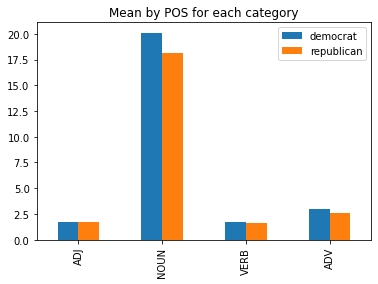

In [64]:
(table1.iloc[-4:]).plot(kind='bar', title='Mean by POS for each category')

## 2.1 Sentiment analysis

In [66]:
from textblob import TextBlob
sent = pd.DataFrame(columns=['polarity','subjectivity'])
sent['sentiment'] = dataTextAnalysis['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [67]:
sent

,polarity,subjectivity,sentiment
0,NaN,NaN,"(0.55, 0.65)"
1,NaN,NaN,"(0.1, 0.48333333333333334)"
2,NaN,NaN,"(0.5, 0.5)"
3,NaN,NaN,"(0.13636363636363635, 0.5)"
4,NaN,NaN,"(0.3181818181818182, 0.6944444444444444)"
...,...,...,...
382205,NaN,NaN,"(0.13636363636363635, 0.5)"
382206,NaN,NaN,"(0.13636363636363635, 0.5)"
382207,NaN,NaN,"(0.42, 0.7133333333333334)"
382208,NaN,NaN,"(0.10416666666666667, 0.3333333333333333)"


In [68]:
sent = sent['sentiment'].apply(pd.Series)
sent.columns=['polarity','subjectivity']

In [70]:
data_with_sentiment = sent.join(dataTextAnalysis)
data_with_sentiment.head()

,polarity,subjectivity,politician_name,party,tweet,likes_count,retweets_count,replies_count
0,0.550000,0.650000,Barack Obama,0,JoeBiden The people I grew up with and my neig...,314,1698,111
1,0.100000,0.483333,Barack Obama,0,VP Biden War should always be the absolute las...,566,2252,98
2,0.500000,0.500000,Barack Obama,0,VP Biden on Iran These are the most crippling ...,217,748,212
3,0.136364,0.500000,Barack Obama,0,Watch live JoeBiden lays out the ObamaBiden pl...,103,531,83
4,0.318182,0.694444,Barack Obama,0,Be sure to follow OFADebates during tonights V...,66,257,46


<AxesSubplot:title={'center':'Distribution by sentiment polarity and subjectiviness for Democrats'}, ylabel='Frequency'>

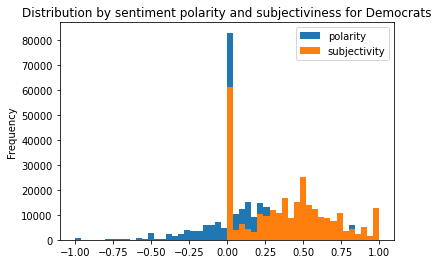

In [73]:
col=['polarity', 'subjectivity']
data_with_sentiment[col].loc[data_with_sentiment['party']==0].plot.hist( bins=50, title='Distribution by sentiment polarity and subjectiviness for Democrats')

AttributeError: 'Rectangle' object has no property 'normed'

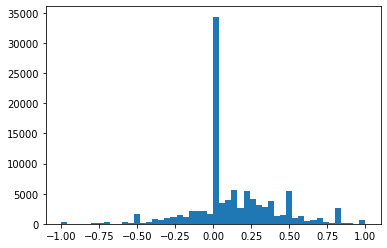

In [76]:
data_with_sentiment[col].loc[data_with_sentiment['party']==1].plot.hist( bins=50, title='Distribution by sentiment polarity and subjectiviness for Republicans')